In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2022-01-01'

df = data.DataReader('KOTAKBANK.NS', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,206.225006,201.500000,203.274994,205.725006,1105496.0,203.842468
2010-01-05,208.425003,205.274994,206.750000,207.762497,1422728.0,205.861313
2010-01-06,211.149994,206.300003,208.000000,210.287506,2786040.0,208.363220
2010-01-07,213.699997,208.625000,211.250000,212.649994,4160024.0,210.704056
2010-01-08,213.512497,209.500000,213.500000,211.337494,1489588.0,209.403580


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,206.225006,201.500000,203.274994,205.725006,1105496.0,203.842468
1,2010-01-05,208.425003,205.274994,206.750000,207.762497,1422728.0,205.861313
2,2010-01-06,211.149994,206.300003,208.000000,210.287506,2786040.0,208.363220
3,2010-01-07,213.699997,208.625000,211.250000,212.649994,4160024.0,210.704056
4,2010-01-08,213.512497,209.500000,213.500000,211.337494,1489588.0,209.403580


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1 )
df.head()

,High,Low,Open,Close,Volume
0,206.225006,201.500000,203.274994,205.725006,1105496.0
1,208.425003,205.274994,206.750000,207.762497,1422728.0
2,211.149994,206.300003,208.000000,210.287506,2786040.0
3,213.699997,208.625000,211.250000,212.649994,4160024.0
4,213.512497,209.500000,213.500000,211.337494,1489588.0


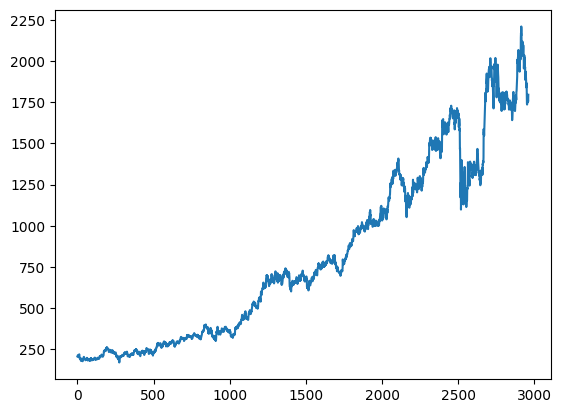

In [5]:
#plt.plot(df.Open)
plt.plot(df.Close)
#plt.plot(df.Volume)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1920.367495
2957    1921.259995
2958    1921.402495
2959    1921.237495
2960    1921.426495
Name: Close, Length: 2961, dtype: float64

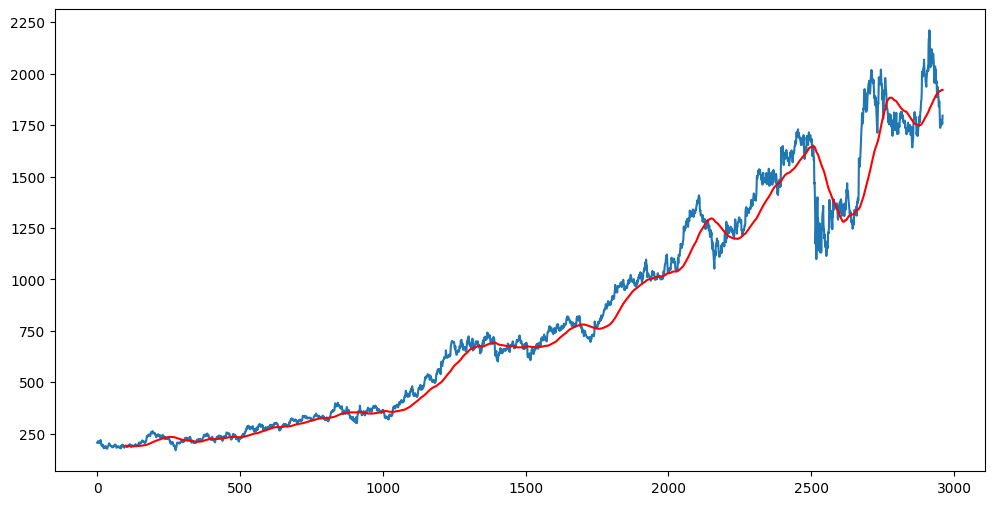

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1844.423748
2957    1843.685748
2958    1842.927498
2959    1841.808998
2960    1840.969748
Name: Close, Length: 2961, dtype: float64

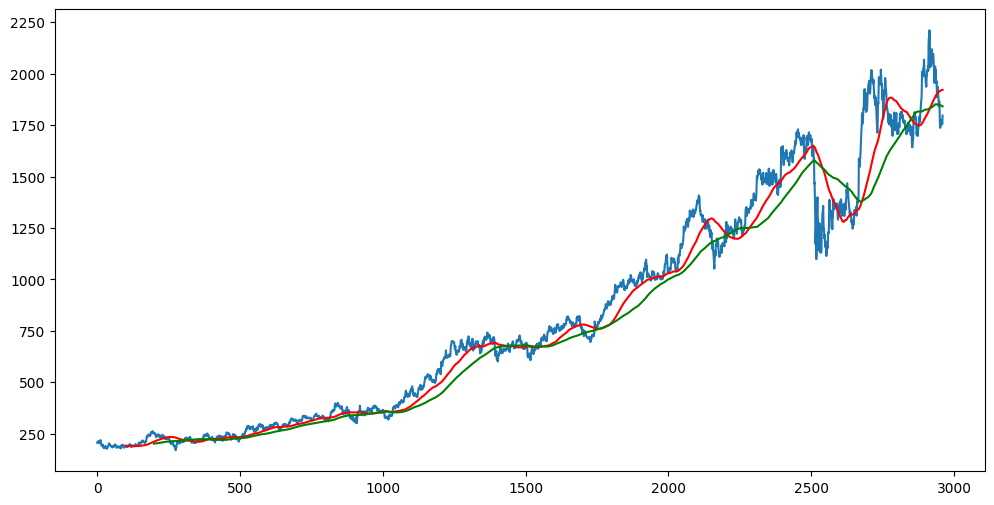

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(2961, 5)

In [11]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2072, 1)
(889, 1)


In [12]:
data_training.head()

,Close
0,205.725006
1,207.762497
2,210.287506
3,212.649994
4,211.337494


In [13]:
data_testing.head()

,Close
2072,1297.150024
2073,1284.250000
2074,1303.250000
2075,1334.599976
2076,1318.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.03261231],
       [0.0344204 ],
       [0.03666112],
       ...,
       [0.9640599 ],
       [0.98189682],
       [1.        ]])

In [16]:
data_training_array.shape

(2072, 1)

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [18]:
x_train.shape

(1972, 100, 1)

In [19]:
#Machine Learning Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
62/62 [==============================] - 8s 98ms/step - loss: 0.0223
Epoch 2/50
62/62 [==============================] - 6s 98ms/step - loss: 0.0053
Epoch 3/50
62/62 [==============================] - 6s 100ms/step - loss: 0.0044
Epoch 4/50
62/62 [==============================] - 6s 95ms/step - loss: 0.0053
Epoch 5/50
62/62 [==============================] - 6s 92ms/step - loss: 0.0045
Epoch 6/50
62/62 [==============================] - 6s 93ms/step - loss: 0.0042
Epoch 7/50
62/62 [==============================] - 6s 90ms/step - loss: 0.0034
Epoch 8/50
62/62 [==============================] - 6s 93ms/step - loss: 0.0039
Epoch 9/50
62/62 [==============================] - 6s 90ms/step - loss: 0.0032
Epoch 10/50
62/62 [==============================] - 6s 93ms/step - loss: 0.0035
Epoch 11/50
62/62 [==============================] - 6s 91ms/step - loss: 0.0031
Epoch 12/50
62/62 [==============================] - 6s 90ms/step - loss: 0.0028
Epoch 13/50
62/62 [=================

In [23]:
model.save('keras_model.S1')

INFO:tensorflow:Assets written to: keras_model.S1\assets


In [24]:
data_testing.head()

,Close
2072,1297.150024
2073,1284.250000
2074,1303.250000
2075,1334.599976
2076,1318.000000


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\pradh\AppData\Local\Temp\ipykernel_10912\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [27]:
final_df.head()

,Close
0,1010.200012
1,999.950012
2,1003.200012
3,1000.099976
4,1000.400024


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[8.46407970e-03],
       [0.00000000e+00],
       [2.68373259e-03],
       [1.23834341e-04],
       [3.71603823e-04],
       [2.55984785e-03],
       [5.07841758e-03],
       [8.09247588e-03],
       [1.89924683e-03],
       [1.46160306e-02],
       [1.93228444e-02],
       [3.17093025e-02],
       [2.74979269e-02],
       [2.24194589e-02],
       [3.84392982e-02],
       [5.00413210e-02],
       [6.12303610e-02],
       [6.23451220e-02],
       [6.61849442e-02],
       [7.63005516e-02],
       [9.50866798e-02],
       [7.27498275e-02],
       [9.00082118e-02],
       [9.99173783e-02],
       [7.10156427e-02],
       [5.14450792e-02],
       [2.79521373e-02],
       [3.00165470e-02],
       [4.27745585e-02],
       [2.64657221e-02],
       [3.55077961e-02],
       [3.50949142e-02],
       [3.48472455e-02],
       [4.14945842e-02],
       [4.64491675e-02],
       [3.78613038e-02],
       [4.54996197e-02],
       [5.99091589e-02],
       [6.68042671e-02],
       [8.68703695e-02],


In [29]:
input_data.shape

(989, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(889, 100, 1)
(889,)


In [32]:
#Predition system model

y_predicted = model.predict(x_test)

28/28 [==============================] - 1s 32ms/step


In [33]:
y_predicted.shape

(889, 1)

In [34]:
y_test

array([0.24541703, 0.23476466, 0.25045417, 0.27634185, 0.26263419,
       0.25103217, 0.25165149, 0.26073489, 0.25639963, 0.26292319,
       0.26705201, 0.27196536, 0.2689513 , 0.27473165, 0.28080099,
       0.26040467, 0.25045417, 0.26808421, 0.25928981, 0.26544181,
       0.27089183, 0.27241947, 0.26775389, 0.28005779, 0.28323696,
       0.27910814, 0.29165981, 0.30165153, 0.30144509, 0.30656479,
       0.31804293, 0.30734932, 0.31957057, 0.32192408, 0.33393888,
       0.33732449, 0.33084227, 0.32914951, 0.28691167, 0.27526842,
       0.27836503, 0.25788605, 0.26007434, 0.25706028, 0.2569364 ,
       0.2521057 , 0.2534269 , 0.2582576 , 0.23142028, 0.2556152 ,
       0.23356734, 0.23431045, 0.23810904, 0.22898431, 0.23579686,
       0.23715939, 0.24199009, 0.20268375, 0.21742362, 0.2269199 ,
       0.2175475 , 0.20458295, 0.21019818, 0.22704379, 0.23546654,
       0.23835671, 0.22964496, 0.23724195, 0.22225432, 0.21275803,
       0.19669696, 0.21548309, 0.2023121 , 0.18447562, 0.17047

In [35]:
y_predicted

array([[0.24599434],
       [0.250167  ],
       [0.2539804 ],
       [0.2574493 ],
       [0.2606743 ],
       [0.2636372 ],
       [0.26632565],
       [0.26879066],
       [0.27103397],
       [0.2731083 ],
       [0.27503467],
       [0.27680603],
       [0.27845317],
       [0.2799936 ],
       [0.28145707],
       [0.28289708],
       [0.28426057],
       [0.28546646],
       [0.28650343],
       [0.28736904],
       [0.28807786],
       [0.28866196],
       [0.2891601 ],
       [0.28959417],
       [0.29000726],
       [0.29044557],
       [0.29092798],
       [0.2914974 ],
       [0.29221505],
       [0.29311815],
       [0.2942178 ],
       [0.2955076 ],
       [0.29693002],
       [0.29844552],
       [0.30000126],
       [0.30159456],
       [0.30331218],
       [0.30517074],
       [0.30716008],
       [0.30908203],
       [0.310776  ],
       [0.31211793],
       [0.3130083 ],
       [0.3133832 ],
       [0.3131942 ],
       [0.31246915],
       [0.3113143 ],
       [0.309

In [36]:
scaler.scale_

array([0.00082576])

In [37]:
scale_factor = 1/0.00082576
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

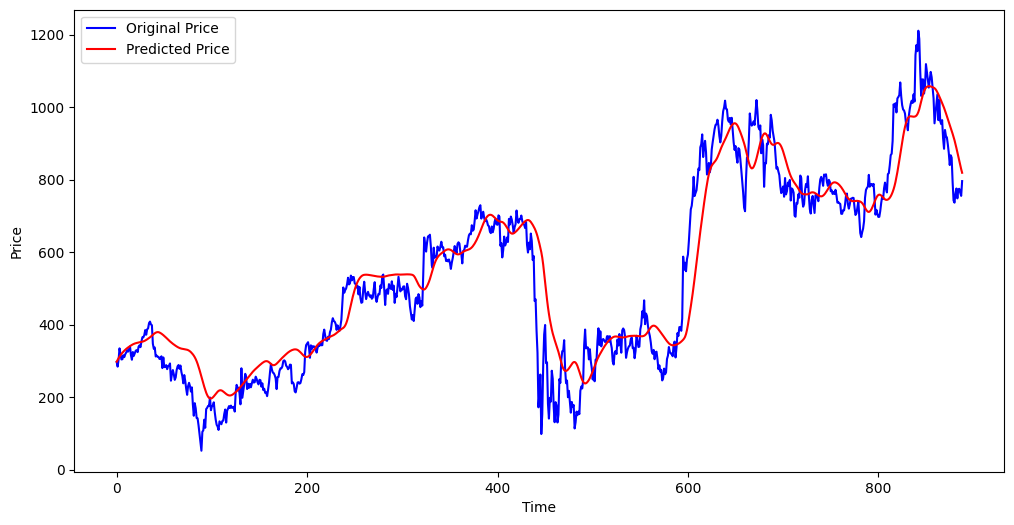

In [38]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()